In [1]:
#Almost the same data but with a different paramter for effect.
import pandas as pd
filename = 'Medusa_Nebula'
df = pd.read_csv(filename + '.csv')
df.head()
n_slices = len(df)
print(n_slices, 'slices')

80 slices


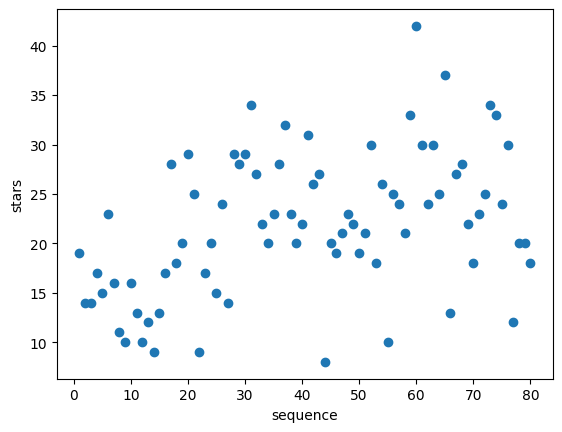

In [2]:
import matplotlib.pylab as plt
sequence = df['sequence'].values
stars = df['stars'].values
plt.scatter(sequence, stars)
plt.xlabel('sequence')
plt.ylabel('stars')
plt.show()

In [3]:
def map_value(value, min_value, max_value, min_result, max_result):
    
    result = min_result + (value - min_value)/(max_value - min_value)*(max_result - min_result)
    return result

In [4]:
sequence_per_beat = 1
s_data = sequence/sequence_per_beat 
duration_beats = max(s_data)  
print('Duration:', duration_beats, 'beats')

Duration: 80.0 beats


Duration: 80.0 seconds


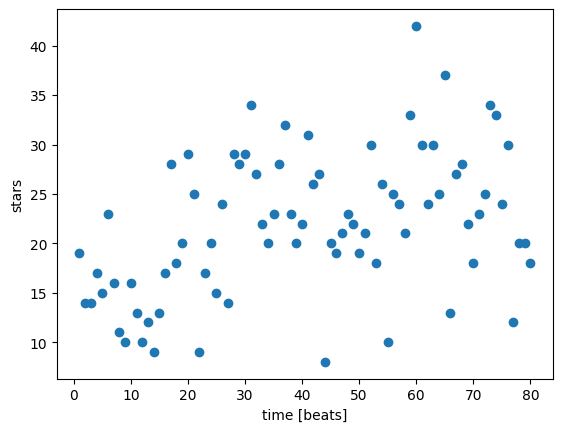

In [5]:
bpm = 60  
duration_sec = duration_beats*60/bpm 
print('Duration:', duration_sec, 'seconds')

plt.scatter(s_data, stars,)
plt.xlabel('time [beats]')
plt.ylabel('stars')
plt.show()

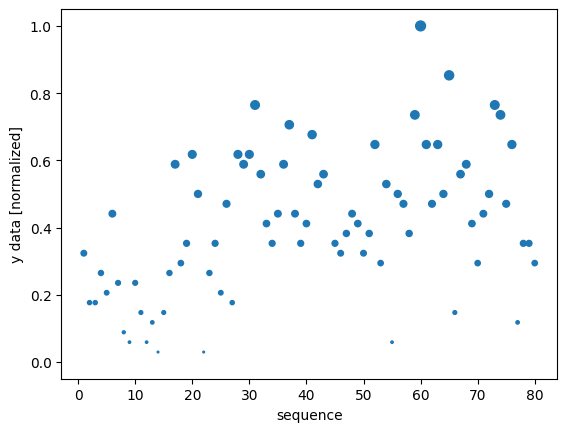

In [6]:
y_data = map_value(stars, min(stars), max(stars), 0, 1)  

y_scale = 1 

y_data = y_data**y_scale

plt.scatter(sequence, y_data, s=50*y_data)
plt.xlabel('sequence')
plt.ylabel('y data [normalized]')
plt.show()

In [7]:
from audiolazy import str2midi 

# 4 octaves of major scale
note_names = ['C2','D2','E2','F2','G2','A2','B2',
             'C3','D3','E3','F3','G3','A3','B3',
             'C4','D4','E4','F4','G4','A4','B4',
             'C5','D5','E5','F5','G5','A5','B5']
note_midis = [str2midi(n) for n in note_names]
n_notes = len(note_midis)
print('Resolution:',n_notes, 'notes')

Resolution: 28 notes


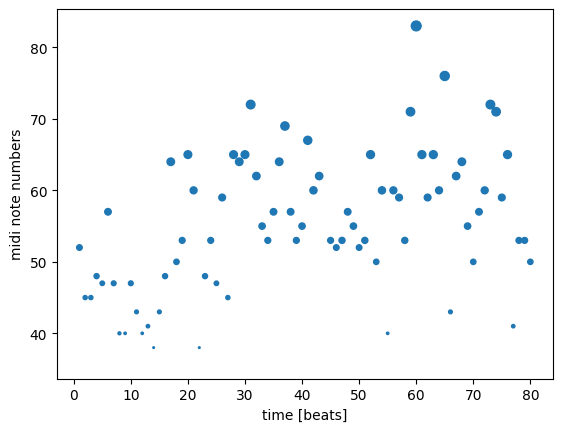

In [8]:
midi_data = []
for i in range(n_slices):
    note_index = round(map_value(y_data[i], 0, 1, 0, n_notes-1)) 
    midi_data.append(note_midis[note_index])

plt.scatter(s_data, midi_data, s=50*y_data)
plt.xlabel('time [beats]')
plt.ylabel('midi note numbers')
plt.show()

In [9]:
from midiutil import MIDIFile 
    
my_midi_file = MIDIFile(1) 
my_midi_file.addTempo(track=0, time=0, tempo=bpm) 

for i in range(n_slices):
    my_midi_file.addNote(track=0, channel=0, pitch=midi_data[i], time=s_data[i], duration=2, volume=50)

with open(filename +'[Stars]'+'.mid', "wb") as f:
    my_midi_file.writeFile(f) 